# Tareas de programación: Programming Assignment 5: Dynamic Programming 1

## 5-1. Money Change Again

Descripción del problema

Formato de entrada. Dinero entero.

Formato de salida. El número mínimo de monedas con denominaciones 1, 3, 4 que cambia dinero.

Restricciones. 1 ≤ dinero ≤ 103

In [ ]:
# python3
import math

money = int(input())
denominations = [1, 3, 4]
minCoins = [0] + [math.inf]*money

for i in range(1, money+1):
    for j in denominations:
        if i>=j:
            coins = minCoins[i-j]+1
            if coins < minCoins[i]:
                minCoins[i] = coins

print(minCoins[money])

34
9


## 5-2. Primitive Calculator

Siempre comenzamos desde 1 y obtenemos el entero positivo al que debemos llegar. Podríamos aplicar solo tres operaciones, multiplicar por 2, por 3 o sumar uno. ¿Cuál es el número mínimo de operaciones que nos da el resultado esperado? ¿Qué secuencia se generará?

Este problema es cercano al anterior, sobre el cambio de moneda. Después de todo, todos son parte del mismo lote acerca de la Programación Dinámica






In [ ]:
# python3

import math

n = int(input())

# number of operations required for getting 0, 1, 2,.. , n
num_operations = [0, 0] + [math.inf]*(n-1)

for i in range(2, n+1):
    temp1, temp2, temp3 = [math.inf]*3

    temp1 = num_operations[i-1] + 1 
    if i%2 == 0: temp2 = num_operations[i//2] + 1
    if i%3 == 0: temp3 = num_operations[i//3] + 1
    min_ops = min(temp1, temp2, temp3)
    num_operations[i] = min_ops

print(num_operations[n])

# Backtracking the numbers leading to n
nums = [n]
while n!=1:
    if n%3 ==0 and num_operations[n]-1 == num_operations[n//3]:
        nums += [n//3]
        n = n//3
    elif n%2 ==0 and num_operations[n]-1 == num_operations[n//2]:
        nums += [n//2]
        n = n//2
    else:
        nums += [n-1]
        n = n - 1

print(' '.join([str(i) for i in nums][::-1]))

5
3
1 2 4 5


## 5-3. Edit Distance

Dadas dos cadenas str1 y str2 y por debajo de las operaciones que se pueden realizar en str1. Encuentre el número mínimo de ediciones (operaciones) requeridas para convertir 'str1' en 'str2'.

Insertar
Eliminar
Reemplazar
Todas las operaciones anteriores son de igual costo.

In [ ]:
# python3
import numpy

def EditDistance(s1, s2):
    """ Computes the edit distance of two strings
    (str, str) -> (int, 2D-array) """
    ln_s1 = len(s1)
    ln_s2 = len(s2)

    # Initializing the matrix
    Matrix = numpy.zeros((ln_s1+1 , ln_s2+1))
    for i in range(ln_s2+1):
        Matrix[0][i] = i

    for i in range(ln_s1+1):
        Matrix[i][0] = i

    # Filling the matrix
    for i in range(1, ln_s1+1):
        for j in range(1, ln_s2+1):
            insertion = Matrix[i][j-1]   + 1
            deletion  = Matrix[i-1][j]   + 1
            mismatch  = Matrix[i-1][j-1] + 1
            match     = Matrix[i-1][j-1]
            if s1[i-1] == s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, match)
            if s1[i-1] != s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, mismatch)
    
    return (int(Matrix[ln_s1][ln_s2]), Matrix)

def OptimalAlignment(Matrix, s1, s2, top, bottom, i, j):
    """ Finds the optimal alignment of two strings given the edit matrix
    (2D-array, str, str, str, str, int, int) -> (str, str) """

    if i == 0 and j == 0:
        return (' '.join(top[::-1]), ' '.join(bottom[::-1]))

    if i>0 and Matrix[i][j] == Matrix[i-1][j] + 1:
        top.append(f'|{s1[i-1]}|')
        bottom.append('|-|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i-1, j)

    elif j>0 and Matrix[i][j] == Matrix[i][j-1] + 1:
        bottom.append(f'|{s2[j-1]}|')
        top.append('|-|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i, j-1)

    else:
        top.append(f'|{s1[i-1]}|')
        bottom.append(f'|{s2[j-1]}|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i-1, j-1)

if __name__ == '__main__':
    s1, s2 = input(), input()
    edit_distance, Matrix = EditDistance(s1, s2)
    top, bottom = OptimalAlignment(Matrix, s1, s2, [], [], len(s1), len(s2))

    print(edit_distance)
    #print(f'Editing distance : {edit_distance}')
    #print(f"Optimal alignment:\n{top}\n{bottom}")

ab
ab
0


## 5-4. Longest Common Subsequence of Two Sequence

El problema de la subsecuencia común más larga (LCS) es encontrar la subsecuencia más larga presente en dos secuencias dadas en el mismo orden, es decir, encontrar la secuencia más larga que se puede obtener de la primera secuencia original eliminando algunos elementos y de la segunda secuencia original eliminando otros elementos.

El problema difiere del problema de encontrar la subcadena común más larga. A diferencia de las subcadenas, no se requiere que las subsecuencias ocupen posiciones consecutivas dentro de la cadena original.

In [ ]:
import numpy

def LCS2(s1, s2, n1, n2):
   
    Matrix = numpy.zeros((n1+1 , n2+1))

    for i in range(1, n1+1):
        for j in range(1, n2+1):
            if s1[i-1] == s2[j-1]:
                Matrix[i][j] = Matrix[i-1][j-1] + 1
            if s1[i-1] != s2[j-1]:
                Matrix[i][j] = max(Matrix[i][j-1], Matrix[i-1][j])
    
    return (int(Matrix[n1][n2]), Matrix)

def printSubsequence(Matrix, s1, s2, i, j, seq):
   
    if i == 0 or j == 0:
        if seq == []: return None
        return ''.join(seq[::-1])

    if s1[i-1] == s2[j-1]:
        seq.append(s1[i-1])
        return printSubsequence(Matrix, s1, s2, i-1, j-1, seq)
    
    if Matrix[i-1][j] > Matrix[i][j-1]: 
        return printSubsequence(Matrix, s1, s2, i-1, j, seq)
    else: 
        return printSubsequence(Matrix, s1, s2, i, j-1, seq)


if __name__ == '__main__':
    n1, s1, n2, s2 = int(input()), input(), int(input()), input()
   
    LCS_length, Matrix = LCS2(s1, s2, n1, n2)
    sequence = printSubsequence(Matrix, s1, s2, n1, n2, [])
    print(LCS_length)

3
1 2 3
3
3 2 1
2


## 5-5. Longest Common Subsequence of Three Sequence

Dadas 3 cadenas de todas con una longitud < 100, la tarea es encontrar la subsecuencia común más larga en las tres secuencias dadas.

In [ ]:
import numpy
                                    
def LCS3(s1, s2, s3, n1, n2, n3):

    Matrix = numpy.zeros((n1+1 , n2+1, n3+1))

    for i in range(1, n1+1):
        for j in range(1, n2+1):
            for k in range(1, n3+1):
                if s1[i-1] == s2[j-1] == s3[k-1]:
                    Matrix[i][j][k] = Matrix[i-1][j-1][k-1] + 1
                else:
                    Matrix[i][j][k] = max(Matrix[i-1][j][k], Matrix[i][j-1][k], Matrix[i][j][k-1])
    
    return (int(Matrix[-1][-1][-1]), Matrix)

def printSubsequence(Matrix, s1, s2, s3, i, j, k, seq):
 
    if i == 0 or j == 0 or k == 0:
        if seq == []: return None
        else : return ''.join(seq[::-1])

    if s1[i-1] == s2[j-1] == s3[k-1]:
        seq.append(s1[i-1])
        return printSubsequence(Matrix, s1, s2, s3, i-1, j-1, k-1, seq)
    
    if Matrix[i-1][j][k] > Matrix[i][j-1][k]:
        if Matrix[i-1][j][k] > Matrix[i][j][k-1]:
            return printSubsequence(Matrix, s1, s2, s3, i-1, j, k, seq)
        else:
            return printSubsequence(Matrix, s1, s2, s3, i, j, k-1, seq)
    else:
        if Matrix[i][j-1][k]> Matrix[i][j][k-1]:
            return printSubsequence(Matrix, s1, s2, s3, i, j-1, k, seq)
        else:
            return printSubsequence(Matrix, s1, s2, s3, i, j, k-1, seq)

if __name__ == '__main__':
    n1, s1, n2, s2, n3, s3 = int(input()), input(), int(input()), input(), int(input()), input()

    LCS_length, Matrix = LCS3(s1, s2, s3, n1, n2, n3)
    print(LCS_length)
    sequence = printSubsequence(Matrix, s1, s2, s3, n1, n2, n3, [])

4
3 2 4 1
3
1 2 3
5
3 4 7 8 7
1


## Coursera

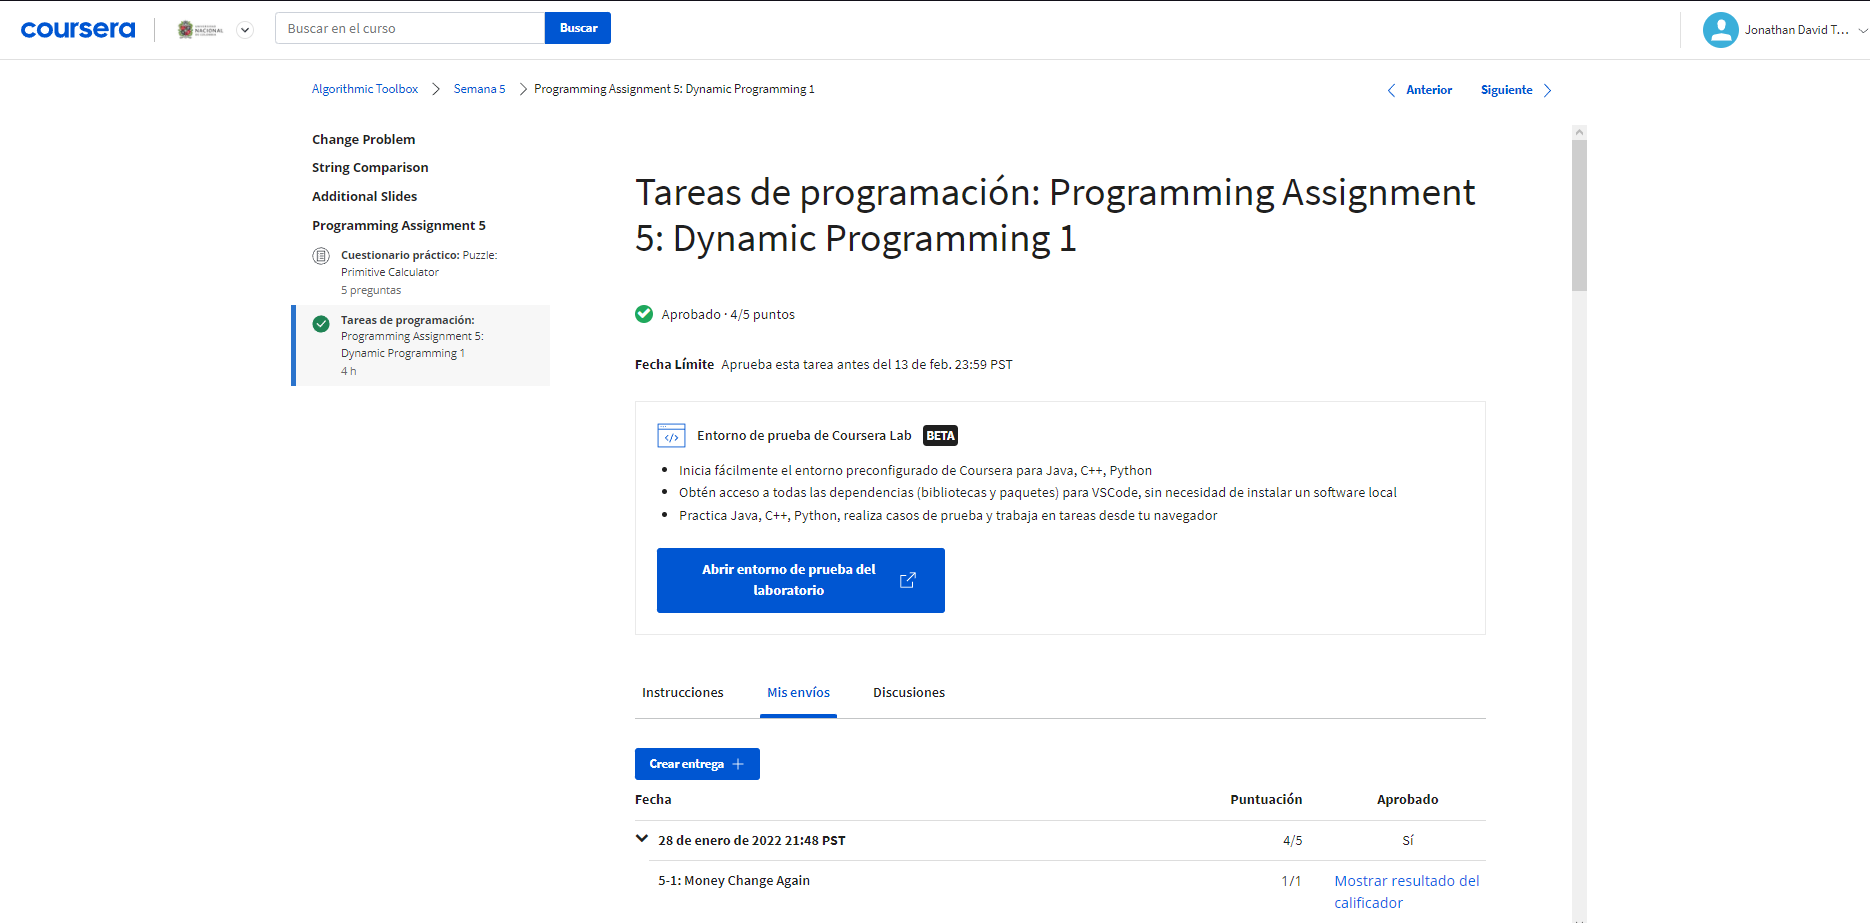

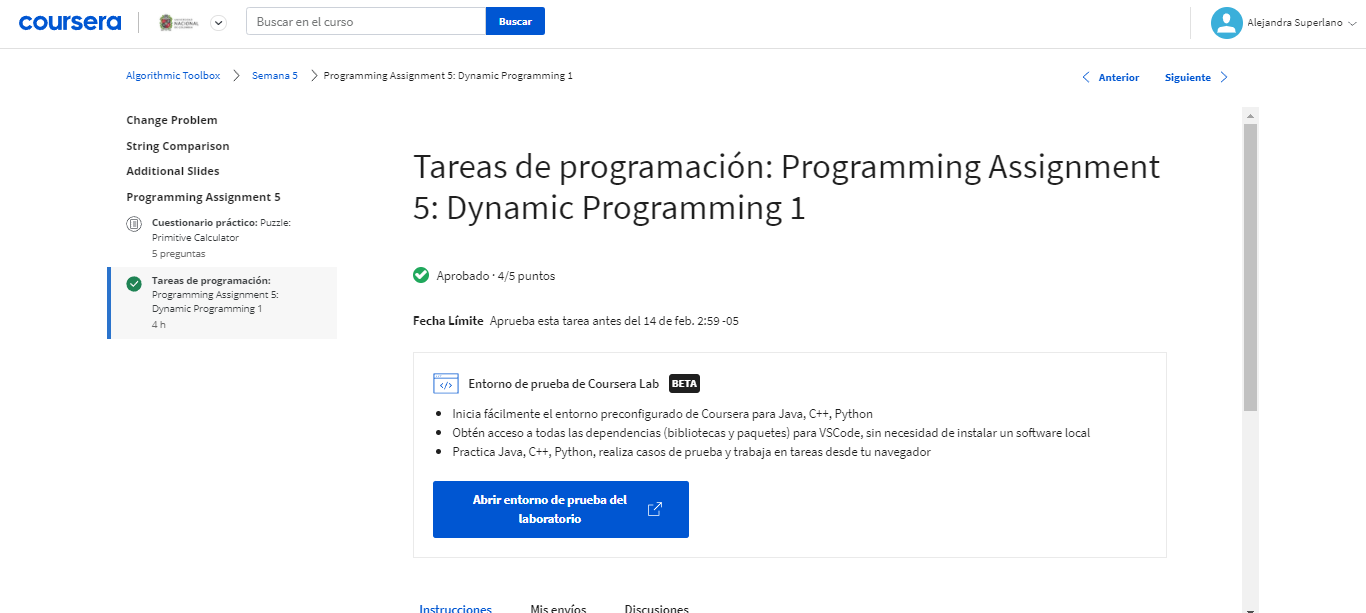